# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23
!pip install tabulate

pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
pyspark 2.4.0 requires py4j==0.10.7, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

%matplotlib inline

In [3]:
pd.__version__

'0.23.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [12]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [13]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
harry_potter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
no_of_movies = len(harry_potter_df)
print(f'Total No of Harry Potter Movies: {no_of_movies}')
harry_potter_sort_df = harry_potter_df.sort_values(by=['year'], ascending=False)
print(tabulate(harry_potter_sort_df, headers=['Harry Potter Movie Name','Year'], tablefmt='fancy_grid', showindex=False))

Total No of Harry Potter Movies: 8
╒══════════════════════════════════════════════╤════════╕
│ Harry Potter Movie Name                      │   Year │
╞══════════════════════════════════════════════╪════════╡
│ Harry Potter and the Deathly Hallows: Part 2 │   2011 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Deathly Hallows: Part 1 │   2010 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Half-Blood Prince       │   2009 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Order of the Phoenix    │   2007 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Goblet of Fire          │   2005 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Prisoner of Azkaban     │   2004 │
├──────────────────────────────────────────────┼────────┤
│ Harry Potter and the Chamber of Secrets      │   2002 │
├────────────────────────────────────

### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
movies_made_in_2015 = len(movies[movies.year == 2015])
print(f'The no of movies made in 2015 are : {movies_made_in_2015}')

The no of movies made in 2015 are : 8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
movies_made_from_2000_to_2018 = len(movies[(movies.year >= 2000) & (movies.year <= 2018)])
print(f'The no of movies made from 2000 to 2018 are : {movies_made_from_2000_to_2018}')

The no of movies made from 2000 to 2018 are : 114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [18]:
movies_hamlet = len(movies[movies.title == 'Hamlet'])
print(f'The no of movies titled Hamlet are : {movies_hamlet}')

The no of movies titled Hamlet are : 20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [19]:
movies_hamlet_df = movies[(movies.title == 'Hamlet') & (movies.year >= 2000)].sort_values(by=['year'])
print(tabulate(movies_hamlet_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════╤════════╕
│ title   │   year │
╞═════════╪════════╡
│ Hamlet  │   2000 │
├─────────┼────────┤
│ Hamlet  │   2009 │
├─────────┼────────┤
│ Hamlet  │   2011 │
├─────────┼────────┤
│ Hamlet  │   2014 │
├─────────┼────────┤
│ Hamlet  │   2015 │
├─────────┼────────┤
│ Hamlet  │   2016 │
├─────────┼────────┤
│ Hamlet  │   2017 │
╘═════════╧════════╛


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [20]:
df_cast_inception = cast[cast.title == 'Inception']
df_cast_inception_support = df_cast_inception[df_cast_inception.n.isnull()]
print(tabulate(df_cast_inception_support, headers='keys', tablefmt='fancy_grid', showindex=False))
supporting_cast = len(df_cast_inception_support)
print(f'the no of supporting cast for the Inception movie are : {supporting_cast}')

╒═══════════╤════════╤═════════════════════════╤═════════╤═══════════════════════════╤═════╕
│ title     │   year │ name                    │ type    │ character                 │   n │
╞═══════════╪════════╪═════════════════════════╪═════════╪═══════════════════════════╪═════╡
│ Inception │   2010 │ Michael (III) August    │ actor   │ LAX Passenger             │ nan │
├───────────┼────────┼─────────────────────────┼─────────┼───────────────────────────┼─────┤
│ Inception │   2010 │ Ken Bhan                │ actor   │ Mombasan Gambler          │ nan │
├───────────┼────────┼─────────────────────────┼─────────┼───────────────────────────┼─────┤
│ Inception │   2010 │ John Ceallach           │ actor   │ LAX Passenger             │ nan │
├───────────┼────────┼─────────────────────────┼─────────┼───────────────────────────┼─────┤
│ Inception │   2010 │ Garvin Cross            │ actor   │ Snow Commander            │ nan │
├───────────┼────────┼─────────────────────────┼─────────┼────────────

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [21]:
df_cast_inception_main = df_cast_inception[~df_cast_inception.n.isnull()]
print(tabulate(df_cast_inception_main, headers='keys', tablefmt='fancy_grid', showindex=False))
main_cast = len(df_cast_inception_main)
print(f'the no of main cast for the Inception movie are : {main_cast}')

╒═══════════╤════════╤══════════════════════╤═════════╤═════════════════════════╤═════╕
│ title     │   year │ name                 │ type    │ character               │   n │
╞═══════════╪════════╪══════════════════════╪═════════╪═════════════════════════╪═════╡
│ Inception │   2010 │ Peter Basham         │ actor   │ Fischer's Jet Captain   │  44 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────────────┼─────┤
│ Inception │   2010 │ Tom Berenger         │ actor   │ Browning                │   8 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────────────┼─────┤
│ Inception │   2010 │ Virgile Bramly       │ actor   │ Bridge Sub Con          │  29 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────────────┼─────┤
│ Inception │   2010 │ Michael Caine        │ actor   │ Miles                   │  11 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────────────┼─────┤
│ Inception │   2010 │ Earl Came

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [22]:
df_cast_inception_main_sort = df_cast_inception_main.sort_values(by=['n'])
print(tabulate(df_cast_inception_main_sort.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════╤════════╤══════════════════════╤═════════╤═════════════════╤═════╕
│ title     │   year │ name                 │ type    │ character       │   n │
╞═══════════╪════════╪══════════════════════╪═════════╪═════════════════╪═════╡
│ Inception │   2010 │ Leonardo DiCaprio    │ actor   │ Cobb            │   1 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────┼─────┤
│ Inception │   2010 │ Joseph Gordon-Levitt │ actor   │ Arthur          │   2 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────┼─────┤
│ Inception │   2010 │ Ellen Page           │ actress │ Ariadne         │   3 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────┼─────┤
│ Inception │   2010 │ Tom Hardy            │ actor   │ Eames           │   4 │
├───────────┼────────┼──────────────────────┼─────────┼─────────────────┼─────┤
│ Inception │   2010 │ Ken Watanabe         │ actor   │ Saito           │   5 │
├───────────┼────────┼──────────────────

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [23]:
#(A) List all movies where there was a character 'Albus Dumbledore'
movies_character_albus_df = cast[cast.character.str.contains('Albus Dumbledore', case= False)]
movies_title_character_albus_df = movies_character_albus_df[['title']].copy()
movies_unique_title_character_albus_df = pd.DataFrame(movies_title_character_albus_df['title'].unique())

movies_unique_title_character_albus_sorted_df = movies_unique_title_character_albus_df.sort_values(by=[0])
print(tabulate(movies_unique_title_character_albus_sorted_df, headers=['Movie Title'], tablefmt='fancy_grid', showindex=False))



╒══════════════════════════════════════════════╕
│ Movie Title                                  │
╞══════════════════════════════════════════════╡
│ Epic Movie                                   │
├──────────────────────────────────────────────┤
│ Harry Potter and the Chamber of Secrets      │
├──────────────────────────────────────────────┤
│ Harry Potter and the Deathly Hallows: Part 1 │
├──────────────────────────────────────────────┤
│ Harry Potter and the Deathly Hallows: Part 2 │
├──────────────────────────────────────────────┤
│ Harry Potter and the Goblet of Fire          │
├──────────────────────────────────────────────┤
│ Harry Potter and the Half-Blood Prince       │
├──────────────────────────────────────────────┤
│ Harry Potter and the Order of the Phoenix    │
├──────────────────────────────────────────────┤
│ Harry Potter and the Prisoner of Azkaban     │
├──────────────────────────────────────────────┤
│ Harry Potter and the Sorcerer's Stone        │
├───────────────────

In [24]:
#(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
movies_actor_character_albus_df = movies_character_albus_df[['name']].copy()
movies_actor_unique_character_albus_df = pd.DataFrame(movies_actor_character_albus_df['name'].unique())
movies_actor_unique_sort_character_albus_df = movies_actor_unique_character_albus_df.sort_values(by=[0])

print(tabulate(movies_actor_unique_sort_character_albus_df, headers=['Actor Name'], tablefmt='fancy_grid', showindex=False))


╒═════════════════════╕
│ Actor Name          │
╞═════════════════════╡
│ Dane Farwell        │
├─────────────────────┤
│ George (X) O'Connor │
├─────────────────────┤
│ Michael Gambon      │
├─────────────────────┤
│ Richard Harris      │
├─────────────────────┤
│ Timothy Tedmanson   │
├─────────────────────┤
│ Toby Regbo          │
╘═════════════════════╛


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [25]:
#(A) How many roles has 'Keanu Reeves' played throughout his career?
cast_keanu_df = cast[cast.name.str.contains('Keanu Reeves', case=False)]
cast_keanu_unique_df = pd.DataFrame(cast_keanu_df['character'].unique())
cast_keanu_unique_sort_df = cast_keanu_unique_df.sort_values(by=[0])
no_of_roles = len(cast_keanu_unique_sort_df)
print(f'The no of roles that Keanu Reeves has played are : {no_of_roles}')
print(tabulate(cast_keanu_unique_sort_df, headers=['Roles'], tablefmt='fancy_grid', showindex=False))


The no of roles that Keanu Reeves has played are : 56
╒══════════════════════╕
│ Roles                │
╞══════════════════════╡
│ Alex Wyler           │
├──────────────────────┤
│ Bob Arctor           │
├──────────────────────┤
│ Chevalier Danceny    │
├──────────────────────┤
│ Chris Nadeau         │
├──────────────────────┤
│ Chris Townsend       │
├──────────────────────┤
│ Conor O'Neill        │
├──────────────────────┤
│ Detective Galban     │
├──────────────────────┤
│ Detective Tom Ludlow │
├──────────────────────┤
│ Dogstar              │
├──────────────────────┤
│ Don John             │
├──────────────────────┤
│ Donaka Mark          │
├──────────────────────┤
│ Donnie Barksdale     │
├──────────────────────┤
│ Dr. Beckham          │
├──────────────────────┤
│ Eddie Kasalivich     │
├──────────────────────┤
│ Evan                 │
├──────────────────────┤
│ Griffin              │
├──────────────────────┤
│ Hank                 │
├──────────────────────┤
│ Harry              

In [26]:
#(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.
cast_keanu_lead_df = cast_keanu_df[(cast_keanu_df.n==1.0) & (cast_keanu_df.year >= 1999)]

cast_keanu_lead_sort_df = cast_keanu_lead_df.sort_values(by=['year'])

print(tabulate(cast_keanu_lead_sort_df[['year','character']], headers=['Year','Character'], tablefmt='fancy_grid', showindex=False))

╒════════╤══════════════════════╕
│   Year │ Character            │
╞════════╪══════════════════════╡
│   1999 │ Neo                  │
├────────┼──────────────────────┤
│   2000 │ Shane Falco          │
├────────┼──────────────────────┤
│   2001 │ Conor O'Neill        │
├────────┼──────────────────────┤
│   2001 │ Nelson Moss          │
├────────┼──────────────────────┤
│   2005 │ John Constantine     │
├────────┼──────────────────────┤
│   2006 │ Alex Wyler           │
├────────┼──────────────────────┤
│   2008 │ Detective Tom Ludlow │
├────────┼──────────────────────┤
│   2008 │ Klaatu               │
├────────┼──────────────────────┤
│   2010 │ Henry Torne          │
├────────┼──────────────────────┤
│   2013 │ Kai                  │
├────────┼──────────────────────┤
│   2014 │ John Wick            │
├────────┼──────────────────────┤
│   2015 │ Evan                 │
├────────┼──────────────────────┤
│   2016 │ Ramsey               │
├────────┼──────────────────────┤
│   2017 │ Joh

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [27]:
#(A) List the total number of actor and actress roles available from 1950 - 1960
roles_1950_to_1960 = len(cast[((cast.type == 'actor') | (cast.type == 'actress')) & ((cast.year >= 1950) & (cast.year <= 1960))])
print(f'the no of roles available from 1950 to 1960 are : {roles_1950_to_1960}')

the no of roles available from 1950 to 1960 are : 234635


In [28]:
#(B) List the total number of actor and actress roles available from 2007 - 2017
roles_2007_to_2017 = len(cast[((cast.type == 'actor') | (cast.type == 'actress')) & ((cast.year >= 2007) & (cast.year <= 2017))])
print(f'the no of roles available from 2007 to 2017 are : {roles_2007_to_2017}')

the no of roles available from 2007 to 2017 are : 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [29]:
#(A) List the total number of leading roles available from 2000 to present
cast_lead_2000_df = cast[(cast.n == 1) & (cast.year >= 2000)]
lead_role_2000_count = len(cast_lead_2000_df)
print(f'the total no of lead roles after year 2000 are : {lead_role_2000_count}')

the total no of lead roles after year 2000 are : 60568


In [30]:
#(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)
cast_non_lead_2000_df = cast[(cast.n > 1) & (cast.year >= 2000)]
cast_non_lead_2000_count = len(cast_non_lead_2000_df)
print(f'the total no of non lead roles are : {cast_non_lead_2000_count}')

the total no of non lead roles are : 1001710


In [31]:
#(C) List the total number of support\extra-credit roles available from 2000 - present
cast_support_extra_2000_df = cast[(cast.n.isnull()) & (cast.year >= 2000)]
cast_support_extra_2000_count = len(cast_support_extra_2000_df)
print(f'the no of support/extra credit roles are : {cast_support_extra_2000_count}')

the no of support/extra credit roles are : 887484


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [32]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

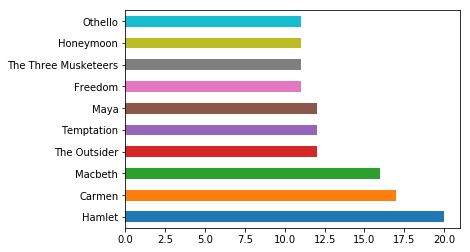

In [33]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [34]:
movies_group_by_df = movies.groupby('year').count()
movies_2000_sorted_df = movies_group_by_df.loc[2000:2009].sort_values(by=['title'], ascending=False).iloc[0:3]
movies_2000_sorted_df.rename(columns = {'title': 'Count'},  inplace = True)
movies_2000_sorted_df

,Count
year,
2009,6125
2008,5151
2007,4467


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

      title
year       
1890      3
1900     39
1910   6799
1920   9034
1930  10388
1940   8718
1950  12934
1960  17976
1970  19526
1980  21034
1990  22992
2000  39452
2010  75733
2020    285
2110      1


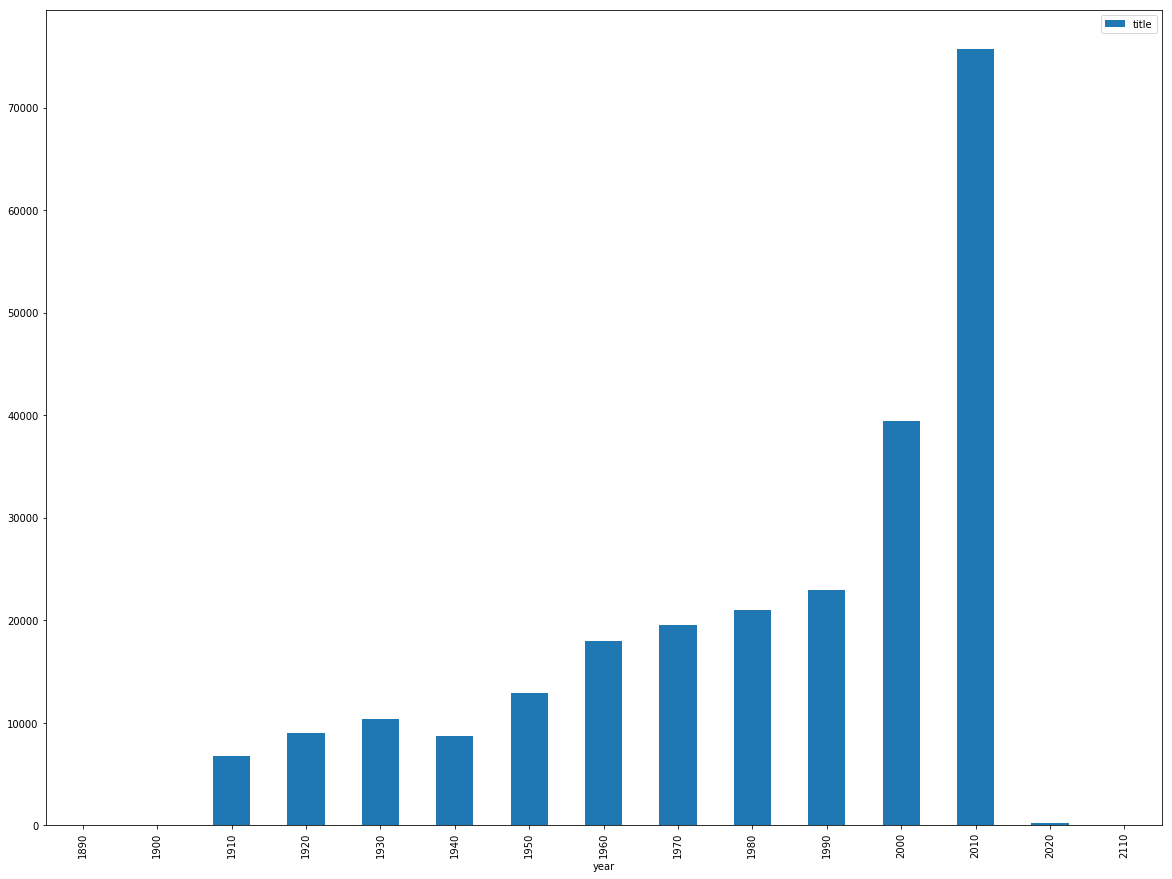

In [105]:
movies_by_decade = movies_group_by_df.groupby((movies_group_by_df.index//10)*10).sum()

list_of_years = list(movies_by_decade.index)
print(movies_by_decade)
movies_by_decade.plot(kind='bar',figsize = (20,15))

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [36]:
cast_character = pd.DataFrame(cast.character)
cast_character_top_10_df = cast_character.groupby('character').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False).iloc[0:10]
print(tabulate(cast_character_top_10_df, headers=['Character','Count'], tablefmt='fancy_grid', showindex=False))


╒═════════════╤═════════╕
│ Character   │   Count │
╞═════════════╪═════════╡
│ Himself     │   20746 │
├─────────────┼─────────┤
│ Dancer      │   12477 │
├─────────────┼─────────┤
│ Extra       │   11948 │
├─────────────┼─────────┤
│ Reporter    │    8434 │
├─────────────┼─────────┤
│ Student     │    7773 │
├─────────────┼─────────┤
│ Doctor      │    7669 │
├─────────────┼─────────┤
│ Party Guest │    7245 │
├─────────────┼─────────┤
│ Policeman   │    7029 │
├─────────────┼─────────┤
│ Nurse       │    6999 │
├─────────────┼─────────┤
│ Bartender   │    6802 │
╘═════════════╧═════════╛


In [37]:
cast_herself_df = cast[cast.character == 'Herself']
cast_character_top_10_df = cast_herself_df.groupby('name').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False).iloc[0:10]
print(tabulate(cast_character_top_10_df, headers=['Name','Count'], tablefmt='fancy_grid', showindex=False))

╒════════════════════════╤═════════╕
│ Name                   │   Count │
╞════════════════════════╪═════════╡
│ Queen Elizabeth II     │      12 │
├────────────────────────┼─────────┤
│ Joyce Brothers         │       9 │
├────────────────────────┼─────────┤
│ Luisa Horga            │       9 │
├────────────────────────┼─────────┤
│ Mar?a Luisa (V) Mart?n │       9 │
├────────────────────────┼─────────┤
│ Hillary Clinton        │       8 │
├────────────────────────┼─────────┤
│ Margaret Thatcher      │       8 │
├────────────────────────┼─────────┤
│ In?s J. Southern       │       6 │
├────────────────────────┼─────────┤
│ Marta Berrocal         │       6 │
├────────────────────────┼─────────┤
│ Oprah Winfrey          │       6 │
├────────────────────────┼─────────┤
│ Marilyn Monroe         │       6 │
╘════════════════════════╧═════════╛


In [38]:
cast_herself_df = cast[cast.character == 'Himself']
cast_character_top_10_df = cast_herself_df.groupby('name').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False).iloc[0:10]
print(tabulate(cast_character_top_10_df, headers=['Name','Count'], tablefmt='fancy_grid', showindex=False))

╒═══════════════════════╤═════════╕
│ Name                  │   Count │
╞═══════════════════════╪═════════╡
│ Adolf Hitler          │      99 │
├───────────────────────┼─────────┤
│ Richard Nixon         │      44 │
├───────────────────────┼─────────┤
│ Ronald Reagan         │      41 │
├───────────────────────┼─────────┤
│ John F. Kennedy       │      37 │
├───────────────────────┼─────────┤
│ George W. Bush        │      25 │
├───────────────────────┼─────────┤
│ Winston Churchill     │      24 │
├───────────────────────┼─────────┤
│ Martin Luther King    │      23 │
├───────────────────────┼─────────┤
│ Bill Clinton          │      22 │
├───────────────────────┼─────────┤
│ Ron Jeremy            │      22 │
├───────────────────────┼─────────┤
│ Franklin D. Roosevelt │      21 │
╘═══════════════════════╧═════════╛


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [39]:
cast_zombie_df = cast[cast.character.str.startswith('Zombie')]
cast_character_zombie_top_10_df = cast_zombie_df.groupby('character').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False).iloc[0:10]
print(tabulate(cast_character_zombie_top_10_df, headers=['Character','Count'], tablefmt='fancy_grid', showindex=False))

╒═════════════════════════════╤═════════╕
│ Character                   │   Count │
╞═════════════════════════════╪═════════╡
│ Zombie                      │    6264 │
├─────────────────────────────┼─────────┤
│ Zombie Horde                │     206 │
├─────────────────────────────┼─────────┤
│ Zombie - Protestor - Victim │      78 │
├─────────────────────────────┼─────────┤
│ Zombie Extra                │      70 │
├─────────────────────────────┼─────────┤
│ Zombie Dancer               │      43 │
├─────────────────────────────┼─────────┤
│ Zombie Girl                 │      36 │
├─────────────────────────────┼─────────┤
│ Zombie #1                   │      36 │
├─────────────────────────────┼─────────┤
│ Zombie #2                   │      31 │
├─────────────────────────────┼─────────┤
│ Zombie Vampire              │      25 │
├─────────────────────────────┼─────────┤
│ Zombie Victim               │      22 │
╘═════════════════════════════╧═════════╛


In [40]:
cast_police_df = cast[cast.character.str.startswith('Police')]
cast_character_police_top_10_df = cast_police_df.groupby('character').size().reset_index(name='Count').sort_values(by=['Count'], ascending=False).iloc[0:10]
print(tabulate(cast_character_police_top_10_df, headers=['Character','Count'], tablefmt='fancy_grid', showindex=False))

╒═════════════════════╤═════════╕
│ Character           │   Count │
╞═════════════════════╪═════════╡
│ Policeman           │    7029 │
├─────────────────────┼─────────┤
│ Police Officer      │    4808 │
├─────────────────────┼─────────┤
│ Police Inspector    │     742 │
├─────────────────────┼─────────┤
│ Police Sergeant     │     674 │
├─────────────────────┼─────────┤
│ Police officer      │     539 │
├─────────────────────┼─────────┤
│ Police              │     456 │
├─────────────────────┼─────────┤
│ Policewoman         │     415 │
├─────────────────────┼─────────┤
│ Police Chief        │     410 │
├─────────────────────┼─────────┤
│ Police Captain      │     387 │
├─────────────────────┼─────────┤
│ Police Commissioner │     337 │
╘═════════════════════╧═════════╛


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

╒════════╤══════════════════════╕
│   Year │ Character            │
╞════════╪══════════════════════╡
│   2013 │ Kai                  │
├────────┼──────────────────────┤
│   2006 │ Bob Arctor           │
├────────┼──────────────────────┤
│   1995 │ Paul Sutton          │
├────────┼──────────────────────┤
│   1991 │ Ted                  │
├────────┼──────────────────────┤
│   1989 │ Ted                  │
├────────┼──────────────────────┤
│   1996 │ Eddie Kasalivich     │
├────────┼──────────────────────┤
│   2005 │ John Constantine     │
├────────┼──────────────────────┤
│   1988 │ Chevalier Danceny    │
├────────┼──────────────────────┤
│   1992 │ Jonathan Harker      │
├────────┼──────────────────────┤
│   2005 │ Dogstar              │
├────────┼──────────────────────┤
│   1993 │ Julian Gitche        │
├────────┼──────────────────────┤
│   2016 │ Detective Galban     │
├────────┼──────────────────────┤
│   1996 │ Jjaks Clayton        │
├────────┼──────────────────────┤
│   1986 │ Tom

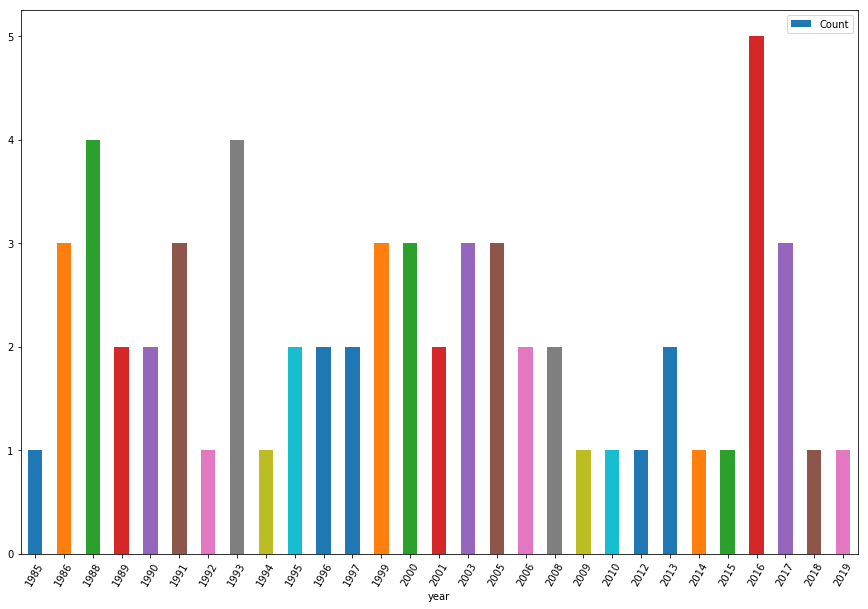

In [41]:
cast_keanu_df = cast[cast.name == 'Keanu Reeves'][['year','character']]
print(tabulate(cast_keanu_df, headers=['Year','Character'], tablefmt='fancy_grid', showindex=False))
cast_keanu_df.groupby('year').size().reset_index(name='Count').sort_values(by=['year']).plot.bar(x='year', y = 'Count',rot = 60, figsize=(15,10))

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


╒════════╤═════╕
│   Year │   n │
╞════════╪═════╡
│   1985 │   1 │
├────────┼─────┤
│   1986 │   2 │
├────────┼─────┤
│   1986 │   3 │
├────────┼─────┤
│   1986 │  12 │
├────────┼─────┤
│   1988 │   6 │
├────────┼─────┤
│   1988 │   2 │
├────────┼─────┤
│   1988 │   1 │
├────────┼─────┤
│   1988 │   5 │
├────────┼─────┤
│   1989 │   8 │
├────────┼─────┤
│   1989 │   1 │
├────────┼─────┤
│   1990 │   2 │
├────────┼─────┤
│   1990 │   6 │
├────────┼─────┤
│   1991 │   2 │
├────────┼─────┤
│   1991 │   2 │
├────────┼─────┤
│   1991 │   1 │
├────────┼─────┤
│   1992 │   4 │
├────────┼─────┤
│   1993 │  13 │
├────────┼─────┤
│   1993 │   1 │
├────────┼─────┤
│   1993 │   5 │
├────────┼─────┤
│   1994 │   1 │
├────────┼─────┤
│   1995 │   1 │
├────────┼─────┤
│   1995 │   1 │
├────────┼─────┤
│   1996 │   1 │
├────────┼─────┤
│   1996 │   1 │
├────────┼─────┤
│   1997 │   2 │
├────────┼─────┤
│   1997 │   1 │
├────────┼─────┤
│   1999 │  42 │
├────────┼─────┤
│   1999 │  42 │
├────────┼────

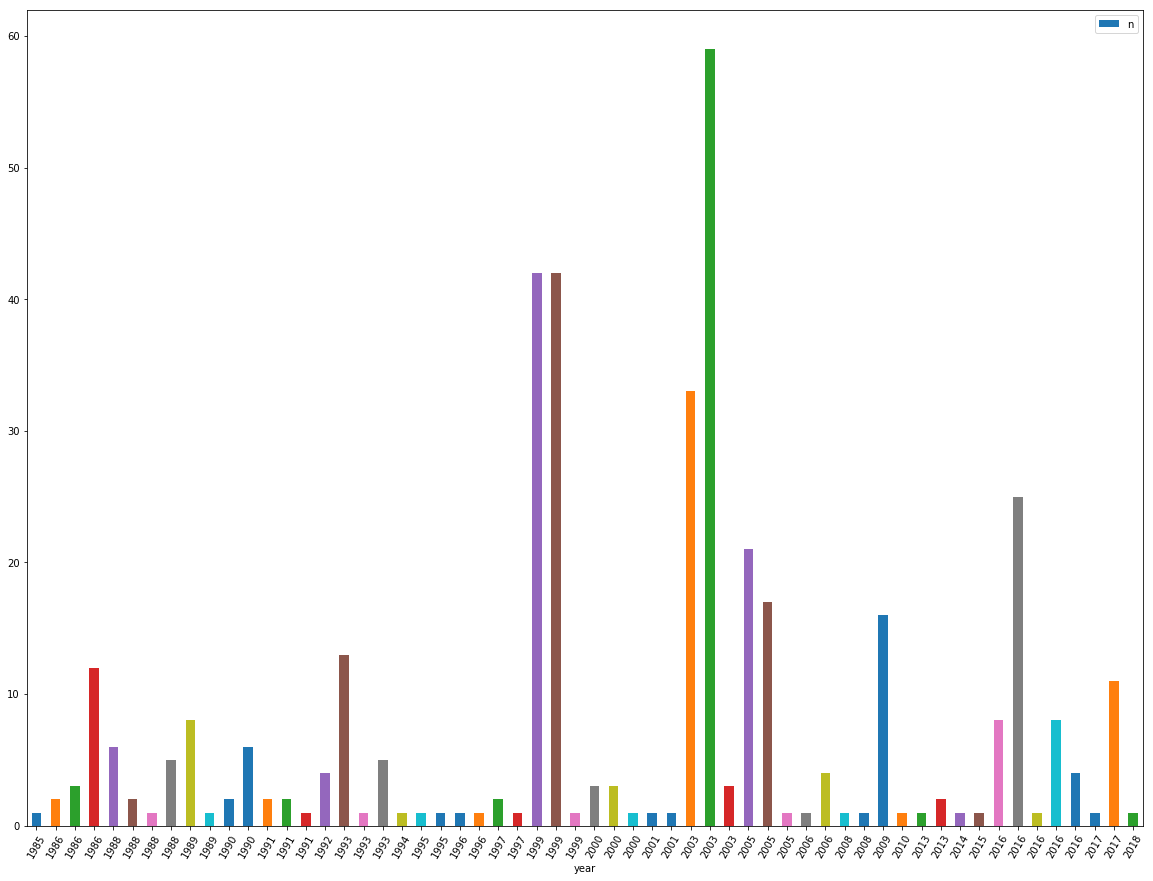

In [42]:
cast_keanu_df = cast[(cast.name == 'Keanu Reeves') & (cast.n.notnull())][['year','n']].sort_values(by=['year'])
print(tabulate(cast_keanu_df, headers=['Year','n'], tablefmt='fancy_grid', showindex=False))
cast_keanu_df.plot(kind='bar',x = 'year', y = 'n',rot=60, figsize=(20,15))

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

╒═════════════════════════════════════════╤════════╕
│ title                                   │   year │
╞═════════════════════════════════════════╪════════╡
│ Hamlet                                  │   1910 │
├─────────────────────────────────────────┼────────┤
│ Hamlet                                  │   1911 │
├─────────────────────────────────────────┼────────┤
│ Hamlet                                  │   1913 │
├─────────────────────────────────────────┼────────┤
│ A Sagebrush Hamlet                      │   1919 │
├─────────────────────────────────────────┼────────┤
│ Hamlet                                  │   1921 │
├─────────────────────────────────────────┼────────┤
│ Han, hun og Hamlet                      │   1922 │
├─────────────────────────────────────────┼────────┤
│ Han, hun og Hamlet                      │   1932 │
├─────────────────────────────────────────┼────────┤
│ Hamlet                                  │   1948 │
├─────────────────────────────────────────┼───

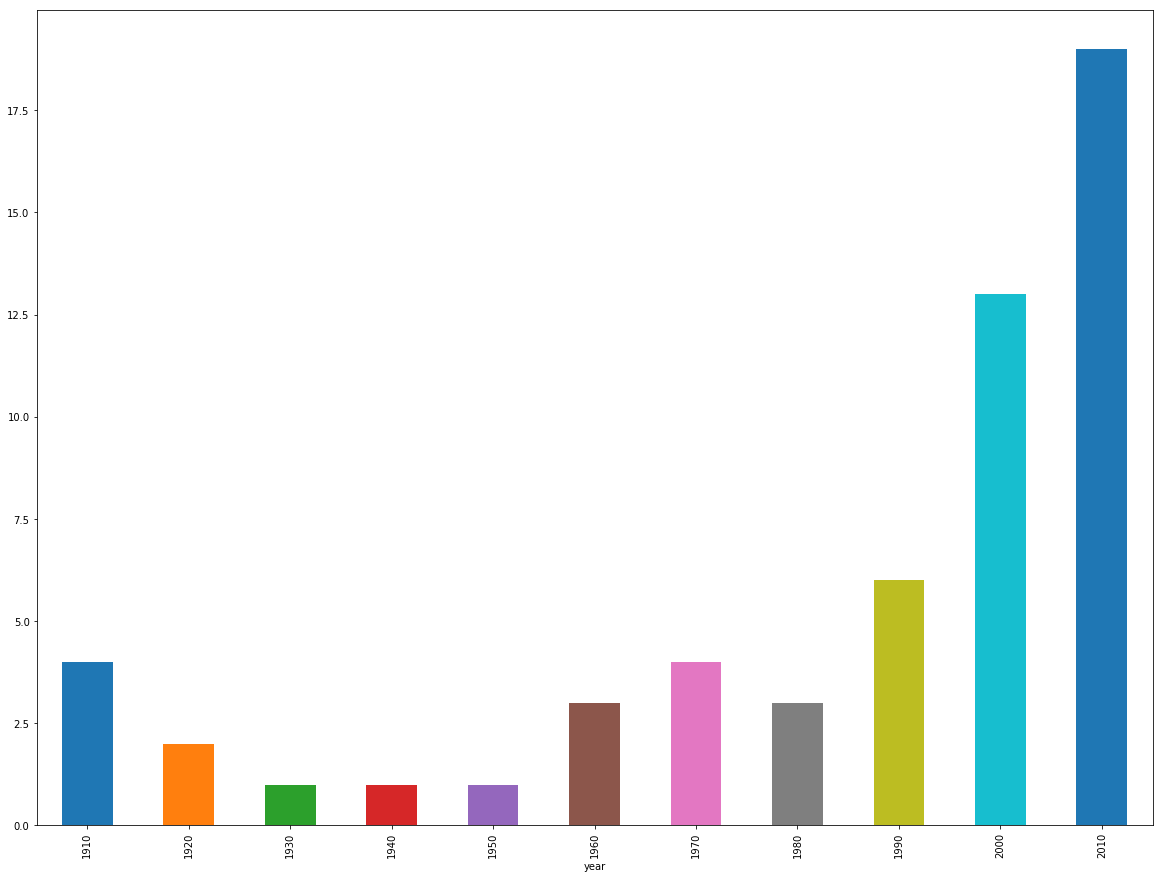

In [106]:
movies_hamlet_df = movies[(movies.title.str.contains('Hamlet', case=False)) ].sort_values(by=['year'])
print(tabulate(movies_hamlet_df, headers='keys', tablefmt='fancy_grid', showindex=False))

movies_hamlet_by_decade = movies_hamlet_df.groupby((movies_hamlet_df.year//10)*10).count()

movies_hamlet_by_decade.year.plot(kind='bar',figsize=(20,15))


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [44]:
cast_lead_df = cast[(cast.n == 1.0) & (cast.year >= 1960) & (cast.year <= 1969)]
print(f'The no of leading roles in the 60s are : {len(cast_lead_df)}')

The no of leading roles in the 60s are : 11823


In [45]:
cast_lead_df = cast[(cast.n == 1.0) & (cast.year >= 2000) & (cast.year <= 2009)]
print(f'The no of leading roles in the 2000s are : {len(cast_lead_df)}')

The no of leading roles in the 2000s are : 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [46]:
cast_frank_oz_df = cast[cast.name == 'Frank Oz'][['year','title', 'character']].sort_values(by=['year'])
cast_frank_oz_group_df = cast_frank_oz_df.groupby(['year','title']).size().reset_index(name='Count')

print(tabulate(cast_frank_oz_group_df[cast_frank_oz_group_df.Count > 1 ], headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤══════════════════════════════════════╤═════════╕
│   year │ title                                │   Count │
╞════════╪══════════════════════════════════════╪═════════╡
│   1979 │ The Muppet Movie                     │       8 │
├────────┼──────────────────────────────────────┼─────────┤
│   1981 │ An American Werewolf in London       │       2 │
├────────┼──────────────────────────────────────┼─────────┤
│   1981 │ The Great Muppet Caper               │       6 │
├────────┼──────────────────────────────────────┼─────────┤
│   1982 │ The Dark Crystal                     │       2 │
├────────┼──────────────────────────────────────┼─────────┤
│   1984 │ The Muppets Take Manhattan           │       7 │
├────────┼──────────────────────────────────────┼─────────┤
│   1985 │ Follow That Bird                     │       3 │
├────────┼──────────────────────────────────────┼─────────┤
│   1992 │ The Muppet Christmas Carol           │       7 │
├────────┼──────────────────────────────

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [47]:
cast_frank_oz_df = cast[cast.name == 'Frank Oz'][['year', 'character']].sort_values(by=['year'])
cast_frank_oz_count_df = cast_frank_oz_df.groupby('character').size().reset_index(name='Count').sort_values(by=['Count'],ascending=False)
cast_frank_oz_character_count_df = cast_frank_oz_count_df[cast_frank_oz_count_df.Count > 1]
print(tabulate(cast_frank_oz_character_count_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════╤═════════╕
│ character      │   Count │
╞════════════════╪═════════╡
│ Animal         │       6 │
├────────────────┼─────────┤
│ Miss Piggy     │       6 │
├────────────────┼─────────┤
│ Yoda           │       6 │
├────────────────┼─────────┤
│ Cookie Monster │       5 │
├────────────────┼─────────┤
│ Sam the Eagle  │       5 │
├────────────────┼─────────┤
│ Fozzie Bear    │       4 │
├────────────────┼─────────┤
│ Bert           │       3 │
├────────────────┼─────────┤
│ Grover         │       2 │
╘════════════════╧═════════╛


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

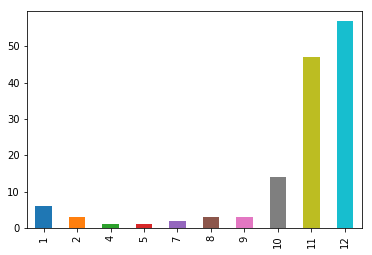

In [48]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

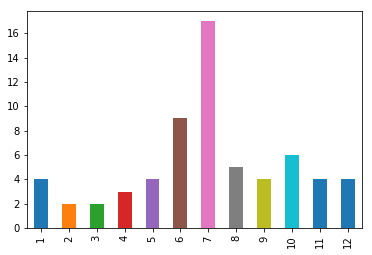

In [49]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

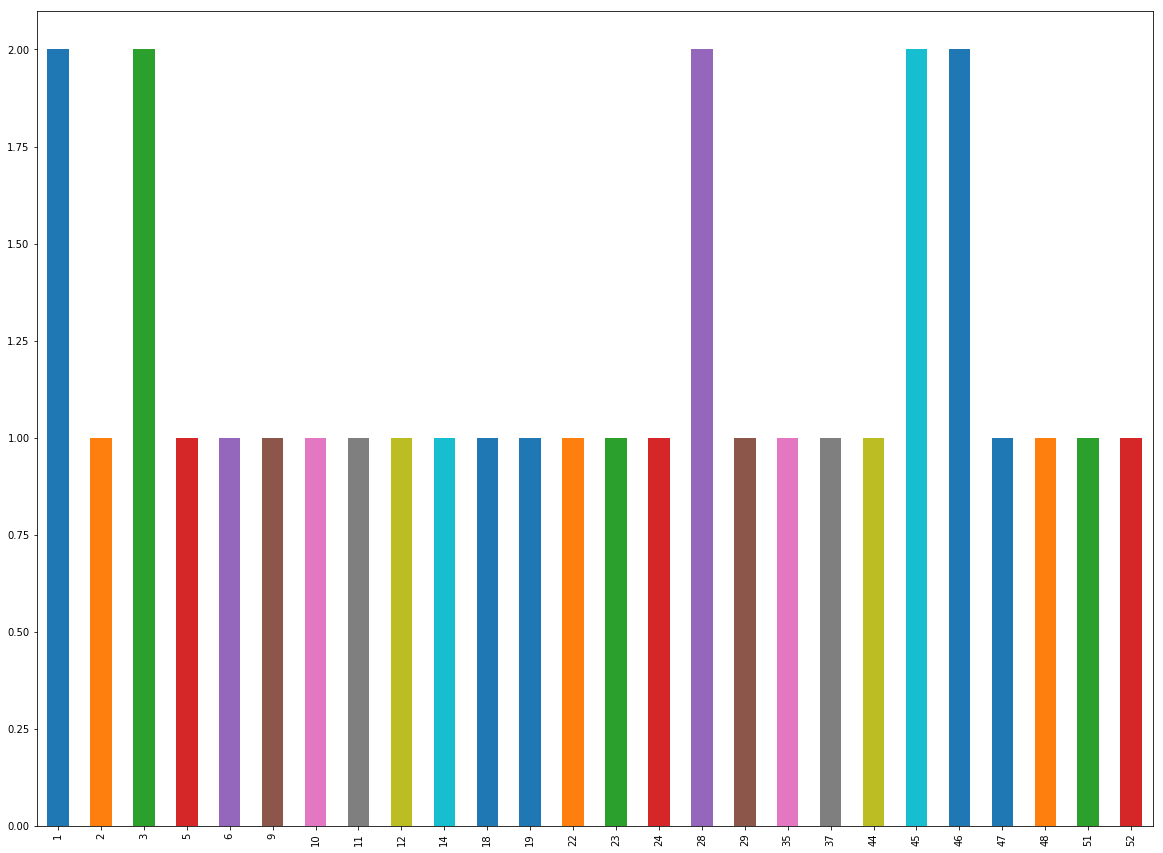

In [86]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar', figsize=(20,15))


### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [66]:
cast_release_merge_df = pd.merge(cast, release_dates, on=['title','year'])
cast_release_merge_keanu_lead_df = cast_release_merge_df[(cast_release_merge_df.name.str.contains('Keanu Reeves')) & (cast_release_merge_df.n == 1.0)]
cast_release_merge_keanu_lead_usa_df = cast_release_merge_keanu_lead_df[cast_release_merge_keanu_lead_df.country == 'USA'].sort_values(by=['date'])[['title','date']]
print(tabulate(cast_release_merge_keanu_lead_usa_df, headers=['Movie Name','Release Date'], tablefmt='fancy_grid', showindex=False))

╒══════════════════════════════════╤═════════════════════╕
│ Movie Name                       │ Release Date        │
╞══════════════════════════════════╪═════════════════════╡
│ The Night Before                 │ 1988-04-15 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ Bill & Ted's Excellent Adventure │ 1989-02-17 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ Bill & Ted's Bogus Journey       │ 1991-07-19 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ Little Buddha                    │ 1994-05-25 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ Speed                            │ 1994-06-10 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ Johnny Mnemonic                  │ 1995-05-26 00:00:00 │
├──────────────────────────────────┼─────────────────────┤
│ A Walk in the Clouds             │ 1995-08-11 00:00:00 │
├──────────────────────────────────┼────────────────────

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

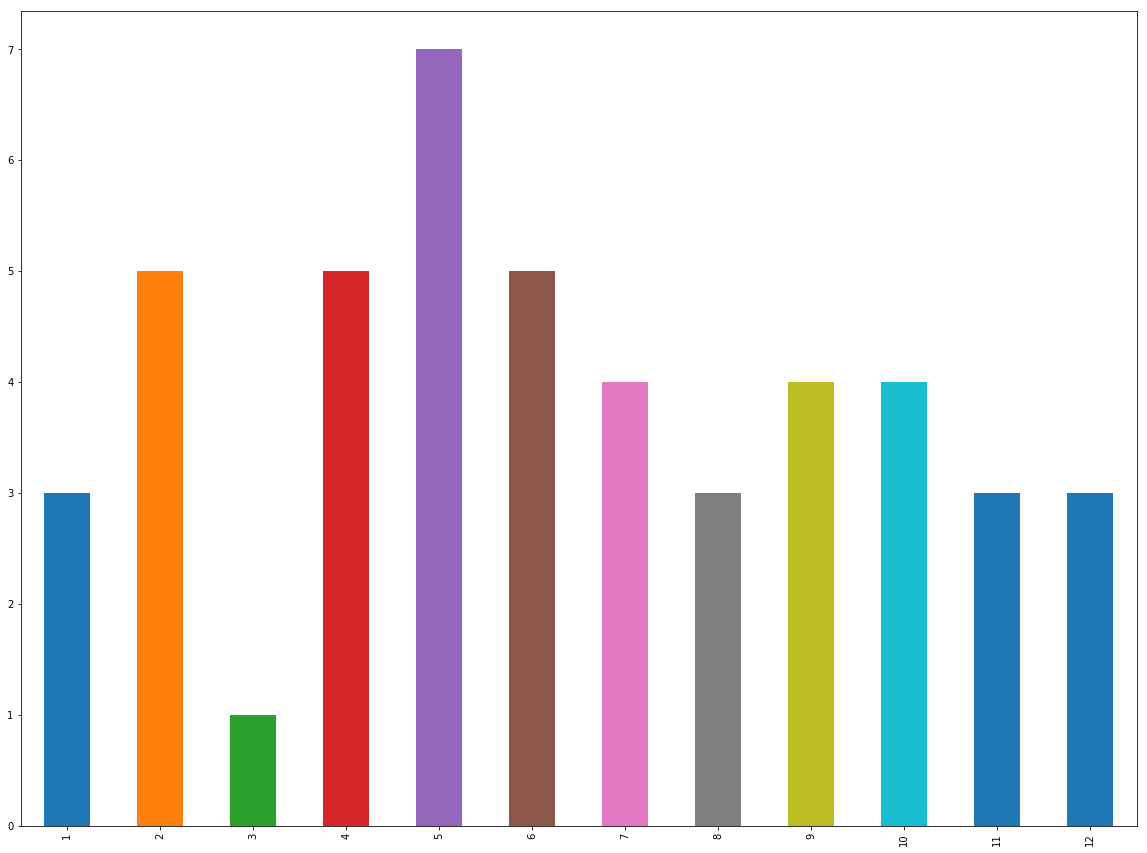

In [85]:

cast_release_merge_keanu_lead_df = cast_release_merge_df[(cast_release_merge_df.name.str.contains('Keanu Reeves')) & (cast_release_merge_df.country == 'USA')]
cast_release_merge_keanu_lead_df.date.dt.month.value_counts().sort_index().plot(kind='bar',figsize=(20,15))

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

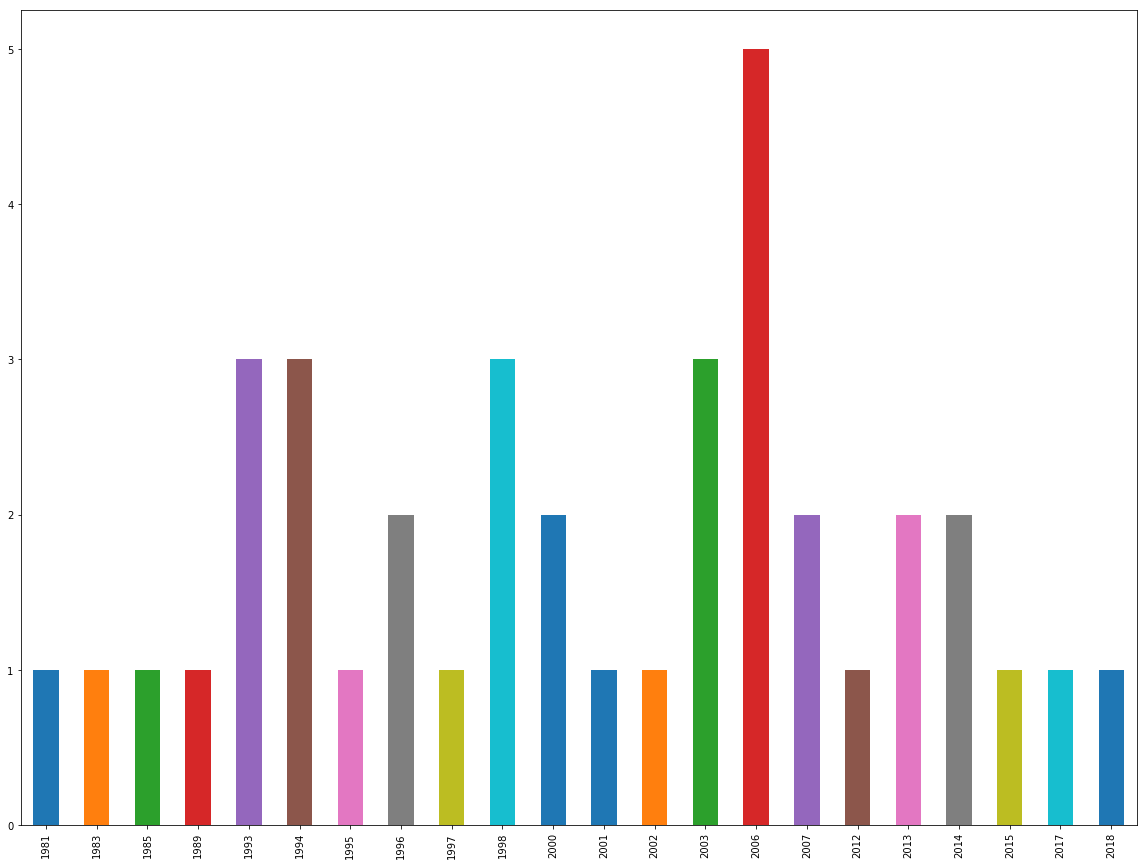

In [84]:
cast_release_merge_ian_lead_df = cast_release_merge_df[(cast_release_merge_df.name.str.contains('Ian McKellen')) & (cast_release_merge_df.country == 'USA')]
cast_release_merge_ian_lead_df.date.dt.year.value_counts().sort_index().plot(kind='bar', figsize=(20,15))